In [1]:
!pip install tensorflow~=2.11.0
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('fivethirtyeight')
import pickle 
import os 
import numpy as np
import cv2 
import numpy as np
import random
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
import time

%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 70.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 80.5 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 80.9 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 51.0 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.1
    Uninstalling tensorboard-data-server-0.7.1:
      Successfully uninstalled tensorboard-d

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 200
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [3]:
train = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/train')
test = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/test')
val = get_training_data('../input/chest-xray-pneumonia/chest_xray/chest_xray/val')

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



/tmp/ipykernel_28/4037217275.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

OpenCV(4.8.0) /io/opencv/modules/imgproc/src/resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [4]:
pnenumonia = 0 
normal = 0 

for i, j in train:
    if j == 0:
        pnenumonia+=1
    else:
        normal+=1
        
print('Pneumonia:', pnenumonia)
print('Normal:', normal)
print('Pneumonia - Normal:', pnenumonia-normal)

Pneumonia: 3875
Normal: 1341
Pneumonia - Normal: 2534


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [7]:
X = []
y = []

for feature, label in train:
    X.append(feature)
    y.append(label)

for feature, label in test:
    X.append(feature)
    y.append(label)
    
for feature, label in val:
    X.append(feature)
    y.append(label)


# resize data for deep learning 


In [8]:
Y = []
for label in y:
    if label == 0:
        Y.append([0,1])
    else:
        Y.append([1,0])

In [9]:
X = np.array(X).reshape(-1, img_size, img_size, 1)
Y = np.array(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=32)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=32)

In [10]:
print(y_train.shape)
y_train[0]

(3747, 2)


array([0, 1])

In [11]:
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255

In [12]:
x_train = list(X_train)
x_val = list(X_val)
y_train = list(y_train)
y_val = list(y_val)

In [13]:
type(y_test)
y_test[0]

array([0, 1])

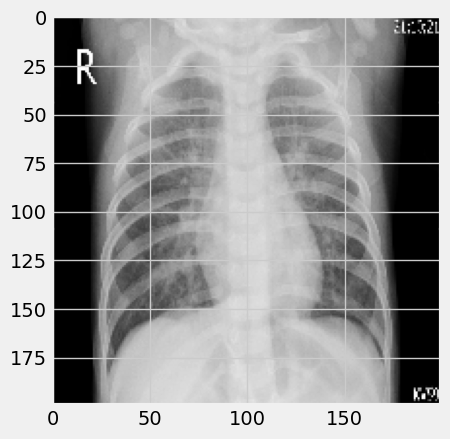

In [14]:
img = x_train[100]
plt.imshow(img, cmap='gray')
plt.show()

In [15]:
print(len(x_train))
len(x_val)
print(x_train[1].shape)
print(y_train[1])

3747
(200, 200, 1)
[0 1]


In [16]:
! pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25859 sha256=56d971699d0de648befafcc6f730e29cade610b91e23a32127869696c57af933
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils


In [17]:
def create_clients(x, y, num_clients=1, initial='clients'):
    ''' return: a dictionary with keys clients' names and value as 
                data shards - tuple of images and label lists.
        args: 
            image_list: a list of numpy arrays of training images
            label_list:a list of binarized labels for each image
            num_client: number of fedrated members (clients)
            initials: the clients'name prefix, e.g, clients_1 
            
    '''

    #create a list of client names
    client_names = ['{}_{}'.format(initial, i+1) for i in range(num_clients)]

    #randomize the data
    data = list(zip(x, y))
    random.shuffle(data)

    #shard data and place at each client
    size = len(data)//num_clients
    shards = [data[i:i + size] for i in range(0, size*num_clients, size)]

    #number of clients must equal number of shards
    assert(len(shards) == len(client_names))

    return {client_names[i] : shards[i] for i in range(len(client_names))} 

In [18]:
clients = create_clients(x_train, y_train, num_clients=10, initial='client')

In [19]:
'''y_test_new=[]
for dt in y_test:
    if dt == 0:
        y_test_new.append([0,1])
    else:
        y_test_new.append([1,0])'''

'y_test_new=[]\nfor dt in y_test:\n    if dt == 0:\n        y_test_new.append([0,1])\n    else:\n        y_test_new.append([1,0])'

In [20]:
def batch_data(data_shard, bs=10):
    '''Takes in a clients data shard and create a tfds object off it
    args:
        shard: a data, label constituting a client's data shard
        bs:batch size
    return:
        tfds object'''
    #seperate shard into data and labels lists
    data, label = zip(*data_shard)
    
    dataset = tf.data.Dataset.from_tensor_slices((list(data), list(label)))
    return dataset.shuffle(len(label)).batch(bs)

In [21]:
clients_batched = dict()
for (client_name, data) in clients.items():
    clients_batched[client_name] = batch_data(data)
    
#process and batch the test set  
test_batched = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(len(y_test))

In [22]:
#clients_batched['client_1']

In [23]:
type(test_batched)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [24]:
X5 = clients["client_1"][0][0]
Y5 = clients["client_1"][0][1]


In [25]:
clients["client_1"][1][0]

array([[[0.49411765],
        [0.55686275],
        [0.53333333],
        ...,
        [0.50980392],
        [0.49411765],
        [0.48235294]],

       [[0.52156863],
        [0.5254902 ],
        [0.5372549 ],
        ...,
        [0.49803922],
        [0.49019608],
        [0.4745098 ]],

       [[0.49803922],
        [0.54509804],
        [0.54901961],
        ...,
        [0.52156863],
        [0.4745098 ],
        [0.47058824]],

       ...,

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.98823529],
        [0.00784314],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.00392157],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        ...,
        [0.        ],
        [0.        ],
        [0.        ]]])

In [26]:

X4 = np.array([clients["client_1"][0][0]])
Y4 = np.array([clients["client_1"][0][1]])
i = 0
for i in range(1,374):
    X4 =np.concatenate((X4,[clients["client_1"][i][0]]))
    Y4 =np.concatenate((Y4,[clients["client_1"][i][1]]))

In [27]:
print(X4.shape)
print(Y4.shape)

(374, 200, 200, 1)
(374, 2)


In [28]:
X5.shape

(200, 200, 1)

In [29]:
class SimpleMLP:
    @staticmethod
    def build():
        model = Sequential()
        model.add(Conv2D(64, (3, 3), input_shape=(200,200,1), padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
        model.add(BatchNormalization(axis=1))
        model.add(Conv2D(32, (3, 3), padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
        model.add(Conv2D(16, (3, 3), padding='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
        model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
        model.add(Dense(64))
        model.add(Activation('relu'))
        model.add(Dropout(0.5))
        model.add(Dense(1))
        model.add(Activation('sigmoid'))
        return model
    

In [30]:
comms_round = 20

In [35]:
print(len(clients['client_1']))
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score,accuracy_score

374


In [43]:
def weight_scalling_factor(clients_trn_data, client_name):
    client_names = list(clients_trn_data.keys())
    #get the bs
    bs = list(clients_trn_data[client_name])[0][0].shape[0]
    #print(bs)
    #first calculate the total training data points across clinets
    global_count = sum([tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy() for client_name in client_names])*bs
    #print(global_count)
    # get the total number of data points held by a client
    local_count = tf.data.experimental.cardinality(clients_trn_data[client_name]).numpy()*bs
    #print(local_count)
    return local_count/global_count


def scale_model_weights(weight, scalar):
    '''function for scaling a models weights'''
    weight_final = []
    steps = len(weight)
    for i in range(steps):
        weight_final.append(scalar * weight[i])
    return weight_final



def sum_scaled_weights(scaled_weight_list):
    '''Return the sum of the listed scaled weights. The is equivalent to scaled avg of the weights'''
    avg_grad = list()
    #get the average grad accross all client gradients
    for grad_list_tuple in zip(*scaled_weight_list):
        layer_mean = tf.math.reduce_sum(grad_list_tuple, axis=0)
        avg_grad.append(layer_mean)
        
    return avg_grad

Y1= []
Y2= []
def test_model(X_test, Y_test,  model, comm_round):
    bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
    #logits = model.predict(X_test, batch_size=100)
    logits = model.predict(X_test)
    logits.reshape(1172)
    Y1 = Y_test
    #print(logits)
    print(logits)
    print(Y_test)
    print("----")
    ytest = []
    ypred = []
    for log1 in logits:
        if log1 > 0.5:
            ypred.append(1)
        else:
            ypred.append(0)
#     for log2 in y_test:
#         b = np.argmax(log2)
#         ytest.append(b
    Y2 = ypred

    #ypred = np.array(logits)
    #ytest = np.array(Y_test)
    print("--")
    print("YPRED",ypred)
    print("--")
    print("YTEST",Y_test)
    loss = sklearn.metrics.log_loss(ypred, Y_test)
    #loss = tf.keras.losses.binary_crossentropy(ypred, Y_test)
    print(loss)
    #loss = 0
#     loss = bce(Y_test, ypred)
    acc = accuracy_score(ypred, Y_test)
    print('comm_round: {} | global_acc: {:.3%} | global_loss: {}'.format(comm_round, acc, loss))
    return acc, loss , ypred , Y_test

In [44]:
import sklearn.metrics

In [45]:
clients_batched['client_1']
import time

times_list = []

In [46]:
#initialize global model
smlp_global = SimpleMLP()
global_model = smlp_global.build()
        
#commence global training loop
for comm_round in range(comms_round):
    start_time = time.time()   
    # get the global model's weights - will serve as the initial weights for all local models
    global_weights = global_model.get_weights()
    
    #initial list to collect local model weights after scalling
    scaled_local_weight_list = list()

    #randomize client data - using keys
    client_names= list(clients_batched.keys())
    random.shuffle(client_names)
    
    #loop through each client and create new local model
    for client in client_names:
        smlp_local = SimpleMLP()
        local_model = smlp_local.build()
        #early_stop = EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True)
        adam = Adam(learning_rate=0.0001)
        local_model.compile(loss='binary_crossentropy',optimizer=adam,metrics=['accuracy'])
        
        #set local model weight to the weight of the global modelJ
        local_model.set_weights(global_weights)  
        #fit local model with client's data
        X = np.array([clients[client][0][0]])
        Y = np.array([clients[client][0][1]])
        i = 0
        for i in range(1,374):
            X =np.concatenate((X,[clients[client][i][0]]))
            Y =np.concatenate((Y,[clients[client][i][1]]))
        Y_new = list(np.argmax(y) for y in Y)
        local_model.fit(X,np.array(Y_new), epochs=2,batch_size = 15, verbose=0)
        
        #scale the model weights and add to list
        scaling_factor = weight_scalling_factor(clients_batched, client)
        scaled_weights = scale_model_weights(local_model.get_weights(), scaling_factor)
        scaled_local_weight_list.append(scaled_weights)
        
        #clear session to free memory after each communication round
        K.clear_session()
        
    #to get the average over all the local model, we simply take the sum of the scaled weights
    
    average_weights = sum_scaled_weights(scaled_local_weight_list)
    global_model.set_weights(average_weights)
    end_time = time.time()
    elapsed_time = end_time - start_time
    times_list.append(elapsed_time)
    #update global model 
    

    #test global model and print out metrics after each communications round
    for(X_test, y_test) in test_batched:
        Y_new_global = list(np.argmax(y) for y in y_test)
        global_acc, global_loss, Y1pred, Y1test = test_model(X_test, Y_new_global, global_model, comm_round)

37/37 [==============================] - 0s 7ms/step
[[0.51973265]
 [0.52342325]
 [0.46716535]
 ...
 [0.5212088 ]
 [0.54940677]
 [0.48261058]]
[1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1

In [47]:
len(Y1pred)

1172

In [48]:
times_list

[115.9250864982605,
 110.8055624961853,
 112.18282294273376,
 115.33092546463013,
 112.30693244934082,
 115.19854354858398,
 112.83239221572876,
 111.60355687141418,
 113.57603693008423,
 115.1375823020935,
 113.08720231056213,
 114.6377124786377,
 114.24536776542664,
 108.84866333007812,
 113.22022891044617,
 111.69141793251038,
 113.9484760761261,
 112.43986988067627,
 111.28223633766174,
 110.22050428390503]

In [41]:
from sklearn.metrics import confusion_matrix,precision_score, recall_score, f1_score,accuracy_score

In [ ]:
cm = confusion_matrix(Y1test, Y1pred)
precision = precision_score(Y1test, Y1pred)
recall = recall_score(Y1test, Y1pred)
f1 = f1_score(Y1test, Y1pred)
accuracy = accuracy_score(Y1test, Y1pred)
print('Confusion matrix:')
print(cm)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)
print('Accuracy:', accuracy)


In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
labels = ['Normal', 'Pnuemonia']
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [ ]:
X2 = [1,2,3,4,5,6,7,8,9,10]
Y2 = [66.71,75.22,84.31,89.99,90.27,91.54,92.88,94.05,93.89,94.02]
Y3 = [68.71,73.22,82.31,85.99,91.27,90.54,94.88,92.05,90.89,91.02]

In [ ]:
plt.plot(X2, Y2)
plt.plot(X2, Y3)
plt.xlabel('no of comm round')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=X2, y=Y2, label='y1 = x * 2')
sns.lineplot(x=X2, y=Y3, label='y2 = x * 3')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y1test,Y1pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = {})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()